Victor CHAU & Tahar AMAIRI

# TP1 : Exploration de données

### Table of Contents

* [1. Représentation des données](#question1)
    * [Corrélation](#correlation)
    * [ACP](#acp)
        * [Standardisation](#std)
        * [2PC](#2pc)
        * [3PC](#3pc)

## Librairies

In [10]:
import sklearn
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importation des données

In [2]:
file = 'TP1_data.csv' #chemin fichier csv

In [3]:
data = pd.read_csv(file,index_col=0)  #création de la dataframe

In [4]:
data.shape

(59, 5)

In [5]:
data.head()

,attribut1,attribut2,attribut3,attribut4,classe
id1,38.0,33.0,10.0,19.0,0
id2,38.2,23.4,17.0,16.6,0
id3,33.0,24.0,19.0,23.0,0
id4,31.0,21.0,29.0,16.0,0
id5,37.0,27.0,24.0,12.0,0


## 1. Représentation des données :<a class="anchor" id="question1"></a>

### -Corrélation-<a class="anchor" id="correlation"></a>

In [6]:
corr = data.corr()

In [38]:
corr  #matrice de corrélation

,attribut1,attribut2,attribut3,attribut4,classe
attribut1,1.000000,0.017056,-0.890974,-0.622651,0.879163
attribut2,0.017056,1.000000,-0.258163,-0.242347,-0.029735
attribut3,-0.890974,-0.258163,1.000000,0.372298,-0.807692
attribut4,-0.622651,-0.242347,0.372298,1.000000,-0.571568
classe,0.879163,-0.029735,-0.807692,-0.571568,1.000000


<AxesSubplot:>

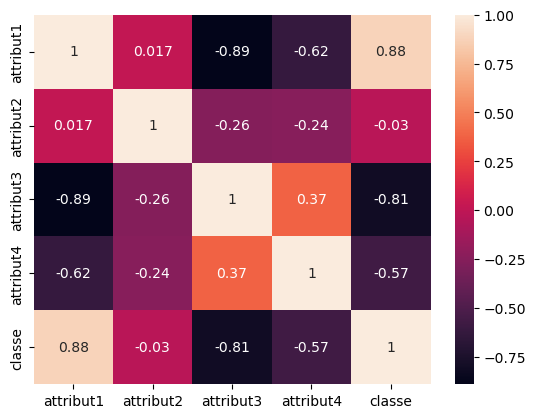

In [39]:
#visualisation correlation avec heatmap
sns.heatmap(corr, annot=True)

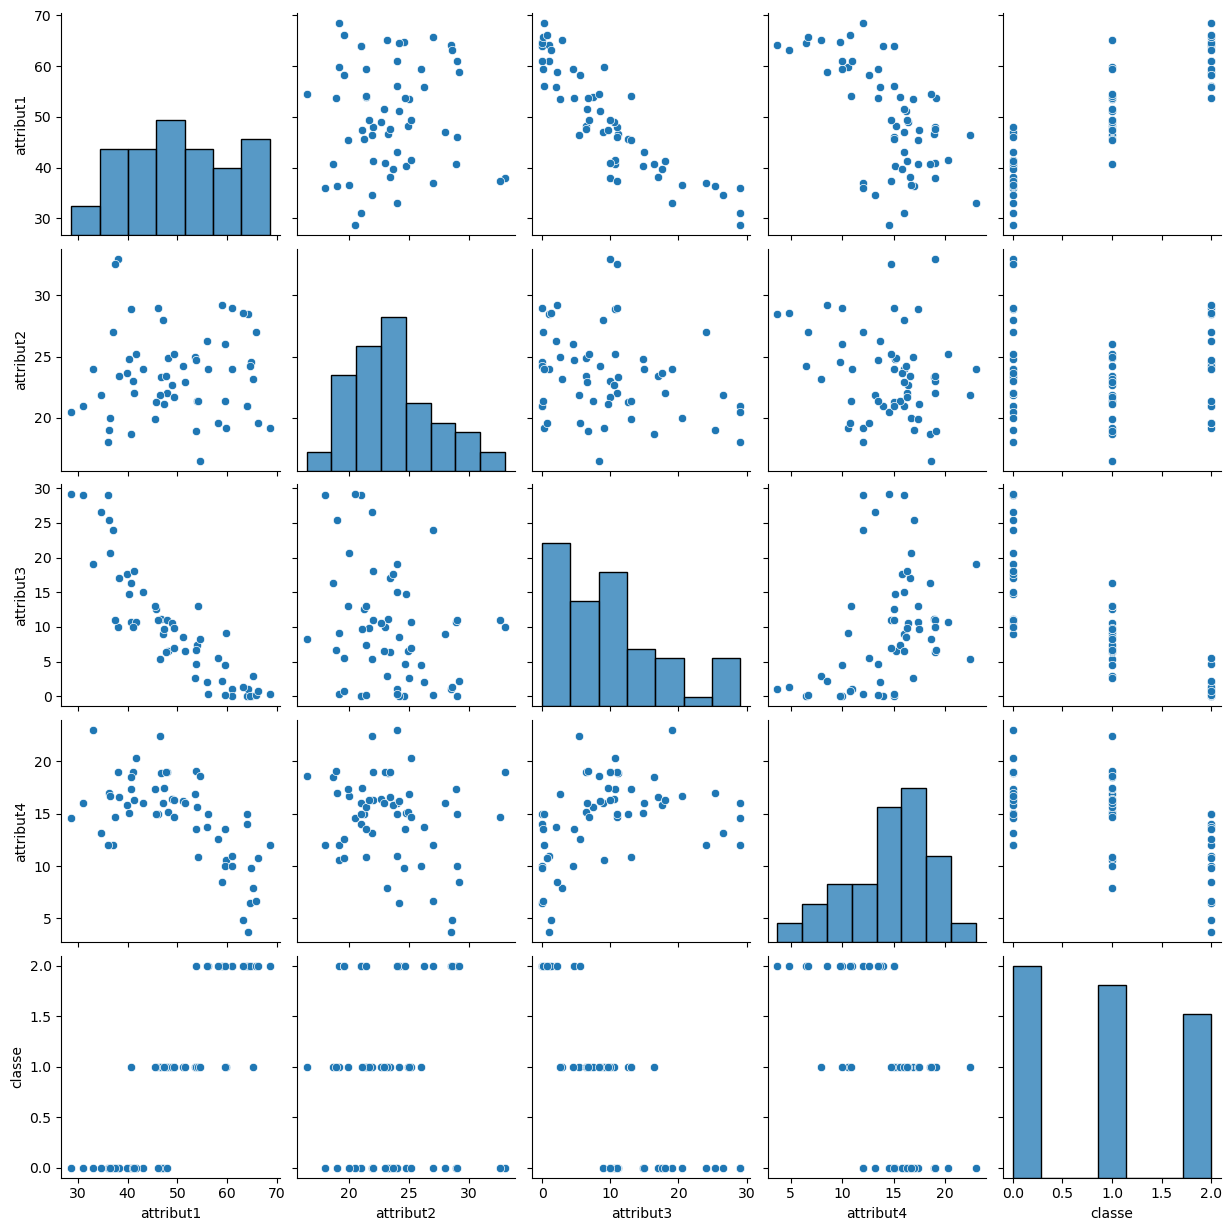

In [40]:
#visualisation des correlations entre les attributs avec des nuages de points
sns.pairplot(data)
plt.show()

> **Les variables sont- elles corrélées ? Les relations de corrélation sont-elles similaires pour toutes les 3 classes ?**
>> On peut voir que l'attribut 1 est  fortement corrélé négativement avec les attributs 3 et 4 (-0.89 et 0.62 respectivement). Les attributs 3 et 4 sont un peu corrélés (0.37). Les attributs 1 et 2 sont très peu corrélés  (0.017), ainsi que les attributs 2 et 4 (-0.24). 
</br>Enfin, la classe 1 est fortement corrélée positivement avec l'attribut 1 (0.88) et négativement avec les attributs 3 et 4 (-0.81 et -0.57 respectivement).

### -ACP- <a class="anchor" id="acp"></a>

> Les variables sont fortement corrélées, une ACP peut être nécessaire pour réduire la dimensionnalité des données.

#### ---Standardisation---<a class="anchor" id="std"></a>

In [46]:
x = data.drop(labels='classe', axis=1).values
y = data['classe'].values

In [47]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
transformed = StandardScaler().fit_transform(x)

#### ---2PC---<a class='anchor' id='2pc'></a>

In [101]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(transformed)

PCA(n_components=2)

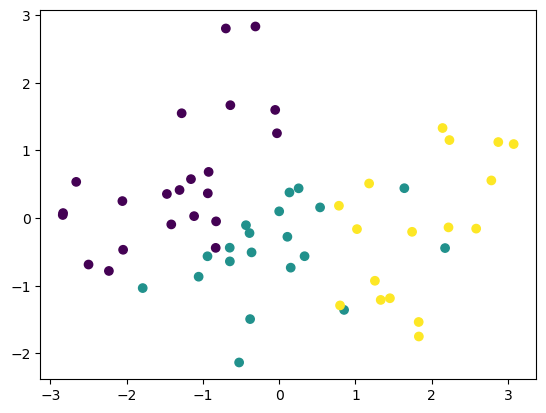

In [102]:
x_std = pca.transform(transformed)
plt.figure()
plt.scatter(x_std[:, 0], x_std[:, 1], c=y)

In [103]:
from sklearn.cluster import KMeans

#Calcul des centroides
kmeans = KMeans(n_clusters=3).fit(x_std)
centroids = kmeans.cluster_centers_   

In [104]:
y_pred = kmeans.predict(x_std)

In [105]:
accuracy = np.mean(y_pred == y)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 33.90%


#### ---3PC---<a class='anchor' id='3pc'></a>

In [106]:
pca = PCA(n_components=3)
pca.fit(transformed)

PCA(n_components=3)

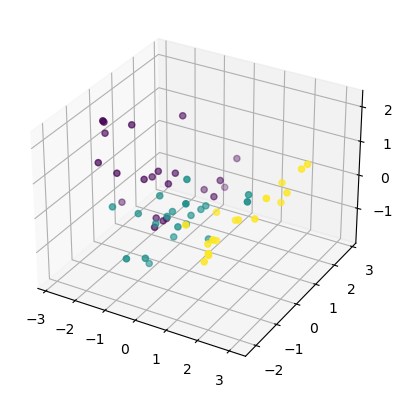

In [107]:
x_std = pca.transform(transformed)
plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x_std[:, 0], x_std[:, 1],x_std[:, 2], c=y)

>L'ajout de la troisième composante principale n'aide pas mieux à séparer les classes. Alors 2PC peuvent être suffisant.

In [111]:
#Calcul des centroides
kmeans = KMeans(n_clusters=3).fit(x_std)
centroids = kmeans.cluster_centers_

In [112]:
y_pred = kmeans.predict(x_std)

In [113]:
accuracy = np.mean(y_pred == y)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 25.42%
